In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [2]:
OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/371313046.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/371313046.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/371313046.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/371313046.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252

,Unnamed: 0,StrikePrice,Last,IV,Chg,StockPrice,T,Difference,Option_type,Implied_volatility
0,2,22.5,0.08,0.13956,-0.01,21.709999,0.07666,0.002132,1,0.137428


No handles with labels found to put in legend.


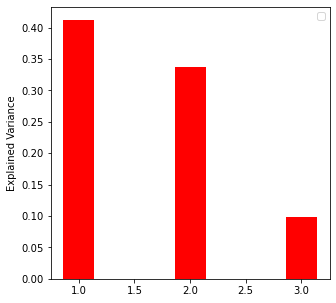

In [3]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#VCR Normalization plots 

def Plot_CVR(argv):
    y = ["OPTION"]
    x = []
    
    scaler = MinMaxScaler()
    sc = scaler.fit_transform(OP_df)
    pca = PCA(n_components=3)
    pca.fit(sc)
    vc = pca.explained_variance_ratio_
    
    import matplotlib.pyplot as plt 
    
    fig=plt.figure(figsize=(5,5))
    bar1 = plt.bar(1, vc[0], color= 'r',width = .28)
    bar1 = plt.bar(2, vc[1], color= 'r', width = .28)
    bar1 = plt.bar(3, vc[2], color= 'r', width = .28)
    
    
    plt.legend( )
    plt.ylabel("Explained Variance")
    plt.show()

Plot_CVR(OP_df)

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


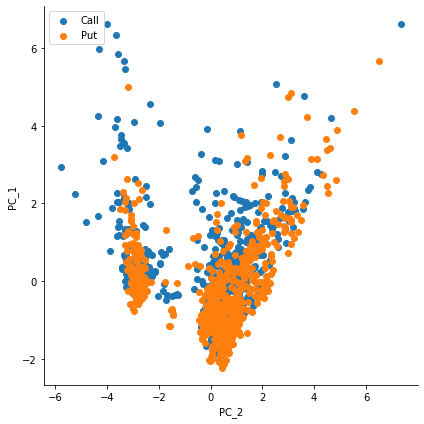

In [4]:
from sklearn import preprocessing

data = OP_df

l = OP_df['Option_type']

norm = StandardScaler().fit_transform(data)
pca = PCA(n_components = 2)
n = pca.fit_transform(norm)

np.shape(n)

tsne_data = n

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("PC_2", "PC_1", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter,"PC_2", "PC_1")
plt.legend(["Call", "Put"])
 
plt.show()

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


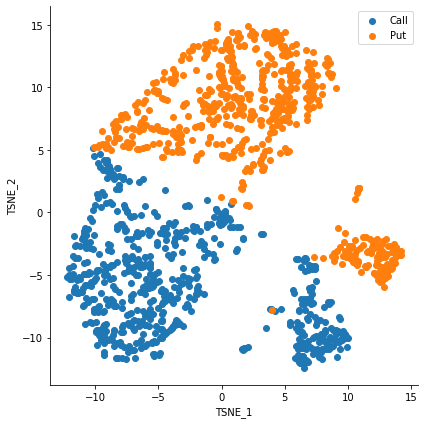

In [5]:
#TSNE
from sklearn import preprocessing

data = OP_df

l = OP_df['Option_type']

s_data = StandardScaler().fit_transform(data)

model = TSNE(n_components = 2 , perplexity=90, metric='euclidean', learning_rate=1)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("TSNE_1", "TSNE_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'TSNE_1', 'TSNE_2')
plt.legend(["Call", "Put"])
 
plt.show()

UMAP(min_dist=1, n_neighbors=30, random_state=420, verbose=True)
Sun May  1 22:36:27 2022 Construct fuzzy simplicial set
Sun May  1 22:36:29 2022 Finding Nearest Neighbors
Sun May  1 22:36:34 2022 Finished Nearest Neighbor Search
Sun May  1 22:36:40 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun May  1 22:36:52 2022 Finished embedding


C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


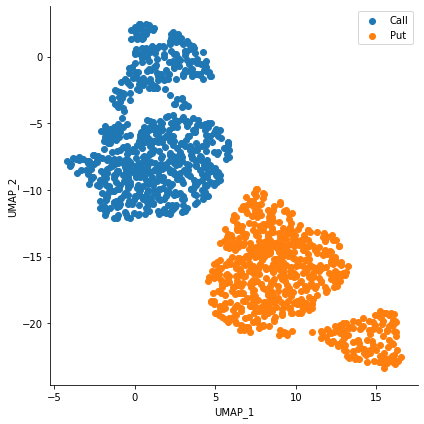

In [7]:
from umap import UMAP
from sklearn import preprocessing

data = OP_df
norm = StandardScaler().fit_transform(data)
ump = UMAP(n_neighbors=30, min_dist=1, random_state=420, verbose=True)
Xumap = ump.fit_transform(norm,OP_df['Option_type'])
np.shape(Xumap)
n = Xumap
np.shape(n)
l = OP_df['Option_type']

tsne_data = np.vstack((n.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("UMAP_1", "UMAP_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'UMAP_1', 'UMAP_2')
plt.legend(["Call", "Put"])
n = plt.show()

In [10]:
OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)

C:\Users\chsha\AppData\Local\Temp/ipykernel_15900/2032235728.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_15900/2032235728.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_15900/2032235728.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_15900/2032235728.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ExpDate', 1)


,Unnamed: 0,StrikePrice,Ticker,Last,IV,Chg,StockPrice,T,Difference,Option_type,Implied_volatility
0,2,22.5,ARR,0.08,0.13956,-0.01,21.709999,0.07666,0.002132,1,0.137428


C:\Users\chsha\AppData\Local\Temp/ipykernel_15900/4209163118.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Ticker', 1)
C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


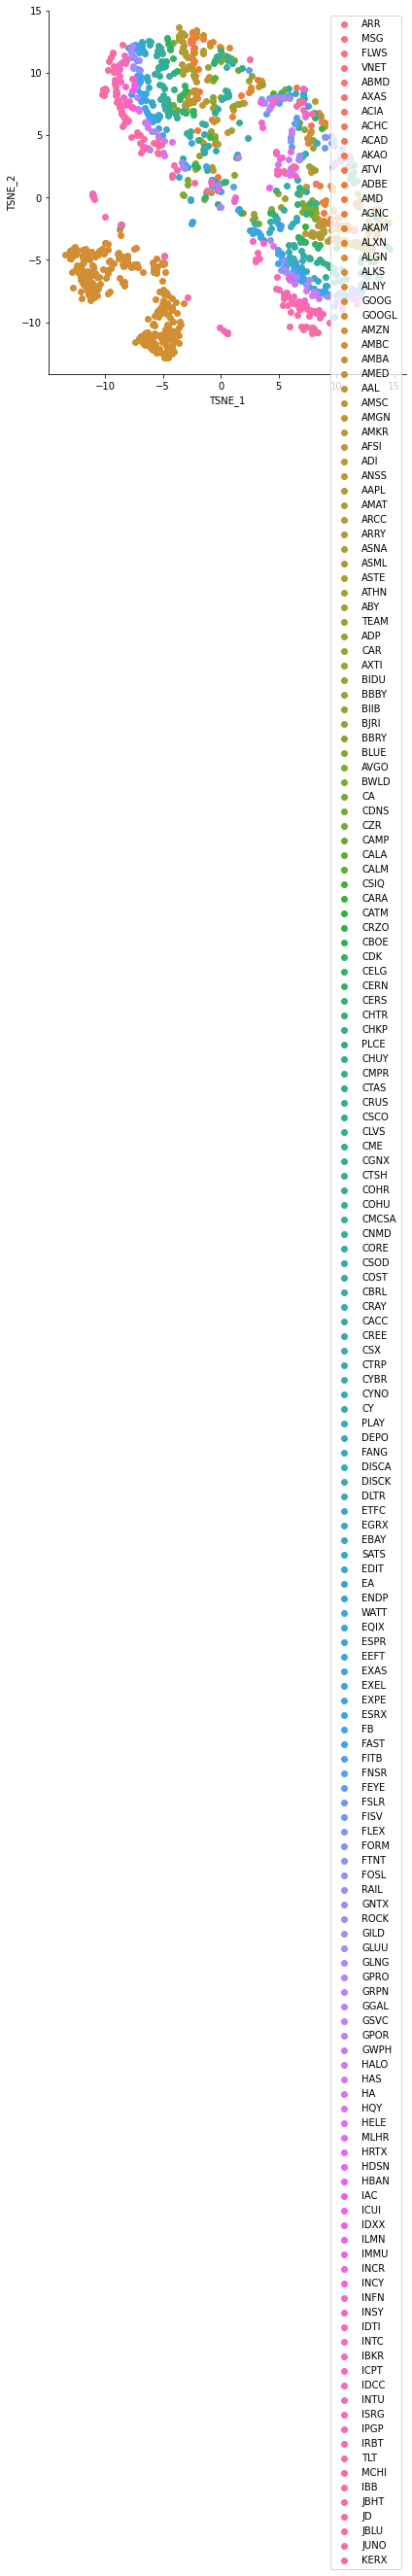

In [12]:
#TSNE
from sklearn import preprocessing

data = OP_df
data = data.drop('Ticker', 1)
l = OP_df['Ticker']

s_data = StandardScaler().fit_transform(data)

model = TSNE(n_components = 2 , perplexity=90, metric='euclidean', learning_rate=1)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("TSNE_1", "TSNE_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'TSNE_1', 'TSNE_2')
plt.legend()
 
plt.show()

In [5]:
len(OP_df)

1371

In [12]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

n = 20
OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)
data = OP_df
OOP_df = OP_df
OP_df = OOP_df
OP_df = OP_df.drop(['Implied_volatility'], axis = 1)


from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform ( OP_df )
Y = np.array(OOP_df['Implied_volatility'])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import spatial
from sklearn.svm import LinearSVR
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


def datagen():
    OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
    OP_df = OP_df.dropna()
    OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
    OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
    OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
    OP_df = OP_df.drop('Ticker', 1)
    OP_df = OP_df.drop('Type', 1)
    OP_df = OP_df.drop('currentDate', 1)
    OP_df = OP_df.drop('ExpDate', 1)
    OP_df.head(1)
    data = OP_df
    OOP_df = OP_df
    OP_df = OOP_df
    OP_df = OP_df.drop(['Implied_volatility'], axis = 1)

    from sklearn.model_selection import train_test_split
    X = StandardScaler().fit_transform ( OP_df )
    Y = np.array(OOP_df['Implied_volatility'])
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
    X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)
    
    return X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test

def svm():
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVR
    regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='linear', epsilon=0.2))
    regr.fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def hl(regr,sv,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test):
    
    test_res = regr.predict(X_train_ts)
    errors = []
    for i in range(0,len(X_train_ts)):
        err = abs ( test_res[i] - Y_train_ts[i] )
        errors.append(err)
    
    errors = np.array(errors)

    idx = (-errors).argsort()[:n]

    bad = np.array( X_train_ts)[idx]


    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_test).query(bad[i])
        neib.append(index)
    
    X_test_bad = np.array( X_test)[neib]
    Y_test_bad = np.array( Y_test)[neib]

    X_test = np.delete( X_test,neib, axis=0)
    Y_test = np.delete( Y_test,neib, axis=0)
    xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
    yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
    regr = sv()
    regr.fit(xt, yt)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    r = r2_score(Y_test, pred)
    return mse,r,X_test_bad,Y_test_bad,bad
def svr():
    regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='linear', epsilon=0.2))
    return regr

def plot1(s,m1,m2):
    
    fig=plt.figure(figsize=(7,4))
    bar2 = plt.bar(s +' MSE', m1 , color= 'r', width = .28)
    bar3 = plt.bar('HL MSE', m2 , color= 'b',width = .28)
    
    plt.legend( (bar2,bar3), ( m1,m2) )
    plt.ylabel("MSE")
    plt.show()

def plot2(s,r1,r2):
    bar4 = plt.bar(s +' R2', r1 , color= 'r', width = .28)
    bar5 = plt.bar('HL R2', r2 , color= 'b',width = .28)
    
    plt.legend( (bar4,bar5), ( r1,r2) )
    plt.ylabel("R2 Error")
    plt.show()
    
from scipy import spatial
def get_res(i,sv):
    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_train).query(bad[i])
        neib.append(index)
    nei = np.array( X_train[index]).reshape(1,9)
    nei_y = np.array( Y_train[index]).reshape(1,)
    xt = np.concatenate((X_train_ts,nei), axis=0)
    yt = np.concatenate((Y_train_ts,nei_y), axis=0)
    regr = sv()
    regr.fit(xt, yt)
    p = regr.predict(X_test_bad[i].reshape(1,9))
    return p
    
def adapt(sv):
    
    pred_bad = np.array([])
    for i in range(0,len(X_test_bad)):
        k = get_res(i,sv)
        pred_bad = np.concatenate((pred_bad,k),axis = 0)
    p2 = reg.predict(X_test_bad)
    mse1 = mean_squared_error(Y_test_bad, pred_bad)
    mse2 = mean_squared_error(Y_test_bad, p2)
    
    bar4 = plt.bar("Classifier Result",mse2 , color= 'r', width = .28)
    bar5 = plt.bar('Adaptive Learning', mse1, color= 'b',width = .28)
    
    plt.legend( (bar4,bar5), ( mse2,mse1) )
    plt.ylabel("MSE Error")
    plt.show()

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykern

0.020628556863825635


C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykern

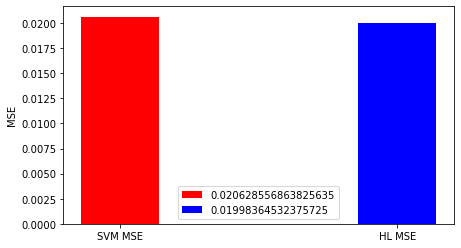

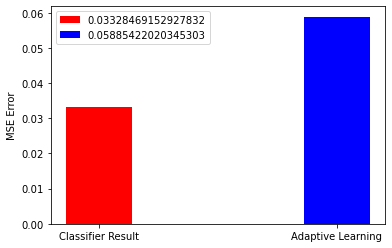

In [13]:

datagen()
m1,r1,reg = svm()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,svr,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("SVM",m1,m2)
adapt(svr)

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykern

1.5220006828613304e-05


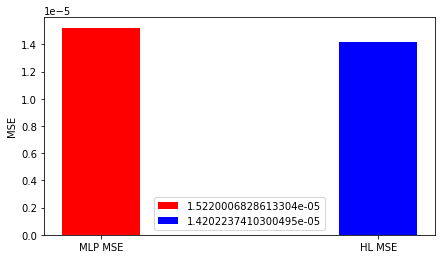

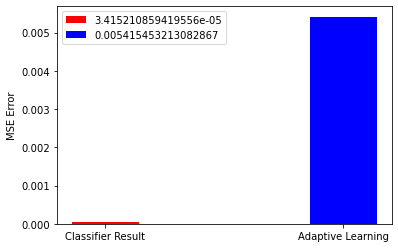

In [14]:
def mlp():
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    regr= MLPRegressor(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(10,), random_state=1, max_iter =1e7)
    regr.fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def mlp_p():
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    regr= MLPRegressor(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(10,), random_state=1, max_iter =1e7)
    
    return regr

datagen()
m1,r1,reg = mlp()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,mlp_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("MLP",m1,m2)
#plot2("SVM",r1,r2)
adapt(mlp_p)

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykern

3.569129683510049e-05


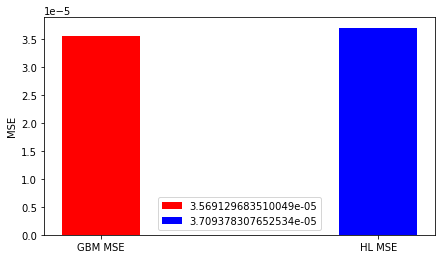

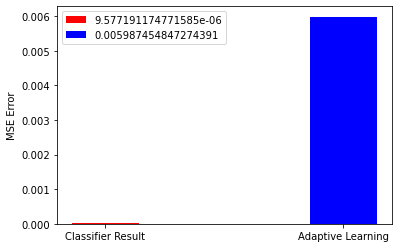

In [15]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
def gdr():
    regr=  GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=20, random_state=0).fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def gdr_p():
    regr=  GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=20, random_state=0)
    
    return regr

datagen()
m1,r1,reg = gdr()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,gdr_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("GBM",m1,m2)
#plot2("SVM",r1,r2)
adapt(gdr_p)

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1808694431.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykern

4.195767057716139e-06


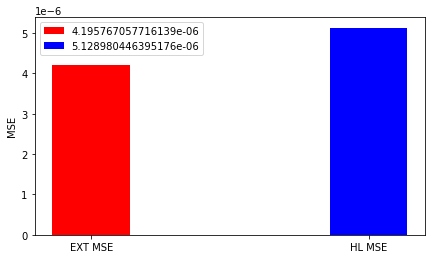

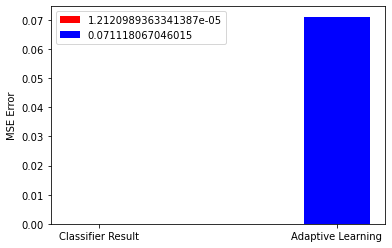

In [16]:
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

def ext():
    regr=  ExtraTreesRegressor(n_estimators=100, random_state=0).fit( X_train, Y_train)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def ext_p():
    regr=  ExtraTreesRegressor(n_estimators=100, random_state=0)
    return regr

datagen()
m1,r1,reg = ext()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,ext_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("EXT",m1,m2)
#plot2("SVM",r1,r2)
adapt(ext_p)

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/2006438700.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/2006438700.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/2006438700.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/2006438700.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

33/33 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.0000e+00
0.01008897847486789
33/33 [==============================] - 0s 899us/step - loss: 0.0788 - accuracy: 0.0000e+00


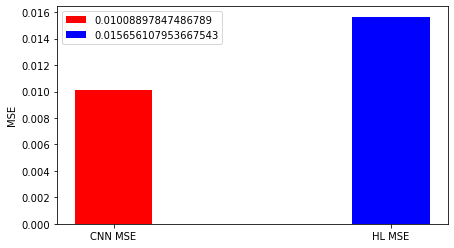

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

def hl(regr,sv,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test):
    
    test_res = regr.predict(X_train_ts)
    errors = []
    for i in range(0,len(X_train_ts)):
        err = abs ( test_res[i] - Y_train_ts[i] )
        errors.append(err)
    
    errors = np.array(errors)

    idx = (-errors).argsort()[:n]

    bad = np.array( X_train_ts)[idx]


    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_test).query(bad[i])
        neib.append(index)
    

    X_test = np.delete( X_test,neib, axis=0)
    Y_test = np.delete( Y_test,neib, axis=0)
    xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
    yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
    regr = sv()
    regr.fit(xt, yt)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    r = r2_score(Y_test, pred)
    return mse,r,X_test_bad,Y_test_bad,bad


def cnn():
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(9,1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit( X_train, Y_train, epochs=1)
    regr= model
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def cnn_p():
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(9,1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

datagen()
m1,r1,reg = cnn()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,cnn_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("CNN",m1,m2)

0.020628556863825635


C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

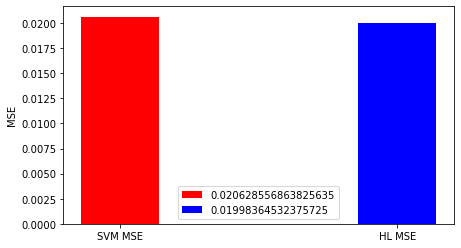

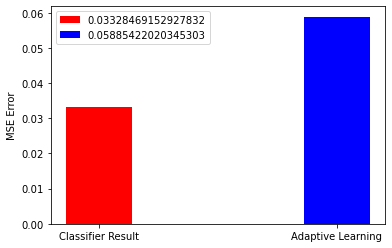

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

1.5220006828613304e-05


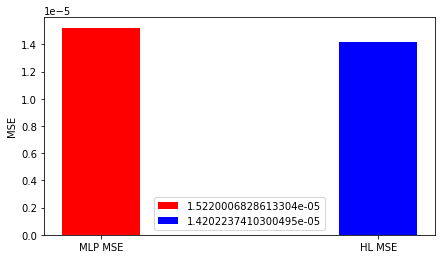

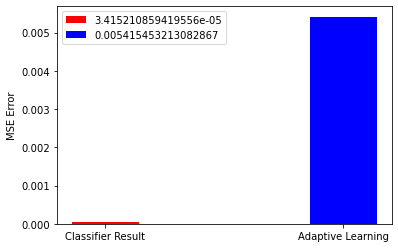

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

3.569129683510049e-05


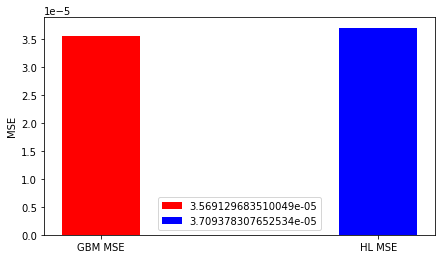

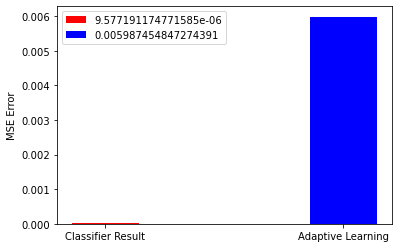

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1228268114.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

4.195767057716139e-06


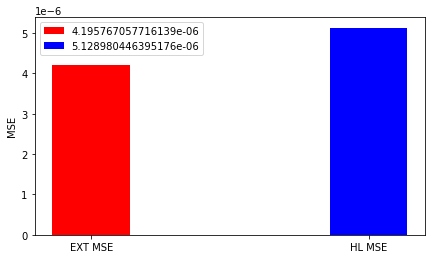

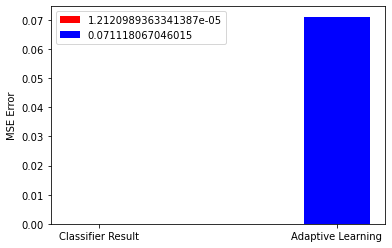

In [20]:

def datagen2():
    OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
    OP_df = OP_df.dropna()
    OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
    OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
    OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
    OP_df = OP_df.drop('Ticker', 1)
    OP_df = OP_df.drop('Type', 1)
    OP_df = OP_df.drop('currentDate', 1)
    OP_df = OP_df.drop('ExpDate', 1)
    OP_df.head(1)
    data = OP_df
    OOP_df = OP_df
    OP_df = OOP_df
    OP_df = OP_df.drop(['Implied_volatility'], axis = 1)
    
    data = OP_df
    data["kurt"] = data.kurtosis(axis = 1, skipna = True)
    data = data.dropna()
    data["skew"] = data.skew(axis = 1, skipna = True)
    data = data.dropna()
    data["in"] = data["StockPrice"] - data["StrikePrice"]

    from sklearn.model_selection import train_test_split
    X = StandardScaler().fit_transform ( OP_df )
    Y = np.array(OOP_df['Implied_volatility'])
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
    X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)
    
    return X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test


datagen2()
m1,r1,reg = svm()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,svr,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("SVM",m1,m2)
#plot2("SVM",r1,r2)
adapt(svr)

datagen2()
m1,r1,reg = mlp()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,mlp_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("MLP",m1,m2)
#plot2("SVM",r1,r2)
adapt(mlp_p)

datagen2()
m1,r1,reg = gdr()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,gdr_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("GBM",m1,m2)
#plot2("SVM",r1,r2)
adapt(gdr_p)

datagen2()
m1,r1,reg = ext()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,ext_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("EXT",m1,m2)
#plot2("SVM",r1,r2)
adapt(ext_p)


In [46]:
def getNearest(x, p,ne) :
    err = distance(x,p[0])
    z = 0
    res = 0
    n = np.array(ne)
    for i in range(1,len(p)):
        if((i in n)):
            z = i
        else:
            e = distance(x,p[i])
            if(e < err ):
                res = i
    return res
def distance(p1,p2):
    mse = np.linalg.norm( np.array(p1) - np.array(p2)  )
    return mse

points = [[0,10], [1,4], [2,3], [3,5],[2,1.1], [4,12]]
x = [2,1]
ne = [1,2,3]
r = getNearest(x, points,ne)
r

4

In [47]:
n = 100

OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)
data = OP_df
OOP_df = OP_df
OP_df = OOP_df
OP_df = OP_df.drop(['Implied_volatility'], axis = 1)

from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform ( OP_df )
Y = np.array(OOP_df['Implied_volatility'])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1086873414.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1086873414.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1086873414.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1086873414.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_

0.015027298630063673

In [48]:
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    index = getNearest( bad[i], X_test,neib)
    neib.append(index)
    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)


xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
ghacc = mean_squared_error(Y_test, pred)
ghacc

0.015271832850556765

3

In [62]:
def cosine(X, Y):
    Y= Y.T
    return X.dot(Y)*np.tanh(X.dot(Y))

def getNearest(x, p,ne) :
    err = distance(x,p[0])
    z = 0
    res = 0
    n = np.array(ne)
    for i in range(1,len(p)):
        if((i in n)):
            z = i
        else:
            e = distance(x,p[i])
            if(e < err ):
                res = i
    return res
def distance(p1,p2):
    x = np.array(p1)
    y = np.array(p2)  
    return cosine(x,y)

points = [[0,10], [1,4], [2,3], [3,5],[2,1.1], [4,12]]
x = [2,1]
ne = [1,2,3]
r = getNearest(x, points,ne)
r

4

In [63]:
n = 10

OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)
data = OP_df
OOP_df = OP_df
OP_df = OOP_df
OP_df = OP_df.drop(['Implied_volatility'], axis = 1)

from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform ( OP_df )
Y = np.array(OOP_df['Implied_volatility'])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/442729809.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/442729809.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/442729809.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/442729809.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1025

0.015027298630063673

In [64]:
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    index = getNearest( bad[i], X_test,neib)
    neib.append(index)
    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)


xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
khacc = mean_squared_error(Y_test, pred)
khacc

0.015114169666570521

In [65]:

OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)
data = OP_df
OOP_df = OP_df
OP_df = OOP_df
OP_df = OP_df.drop(['Implied_volatility'], axis = 1)

from sklearn.model_selection import train_test_split
X = StandardScaler().fit_transform ( OP_df )
Y = np.array(OOP_df['Implied_volatility'])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1190771868.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1190771868.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1190771868.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/1190771868.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_1

0.015027298630063673

In [66]:
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    distance,index = spatial.KDTree(X_test).query(bad[i])
    neib.append(index)

neib = list(set(neib))    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)
xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
hacc = mean_squared_error(Y_test, pred)
hacc

0.014759234075982416

No handles with labels found to put in legend.


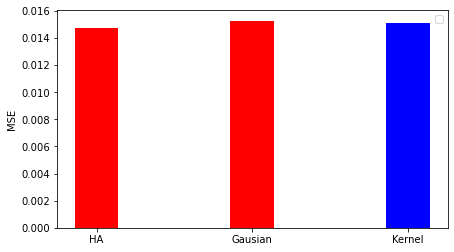

In [67]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
    
fig=plt.figure(figsize=(7,4))
bar4 = plt.bar("HA", hacc, color= 'r', width = .28)
bar2 = plt.bar("Gausian", ghacc, color= 'r', width = .28)
bar3 = plt.bar("Kernel", khacc, color= 'b',width = .28)
    
plt.legend( (bar4, bar2,bar3), ('HA','Gausian','Kernel') )
plt.ylabel("MSE")
plt.legend()
plt.show()

C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/3960558246.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/3960558246.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Ticker', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/3960558246.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('Type', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_10252/3960558246.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OP_df = OP_df.drop('currentDate', 1)
C:\Users\chsha\AppData\Local\Temp/ipykernel_

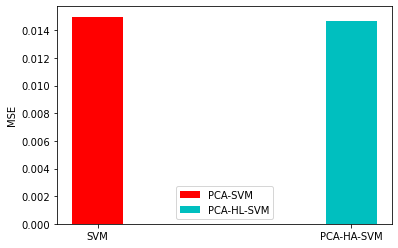

In [71]:
n = 10

OP_df = pd.read_csv('EuropeanOptionCleanData.csv')
OP_df = OP_df.dropna()
OP_df['Option_type'] =  np.where(OP_df['Type'] == "Call", 1, 0)
OP_df['Implied_volatility'] = OP_df['ImpliedVolatility (caluclated)']
OP_df = OP_df.drop('ImpliedVolatility (caluclated)', 1)
OP_df = OP_df.drop('Ticker', 1)
OP_df = OP_df.drop('Type', 1)
OP_df = OP_df.drop('currentDate', 1)
OP_df = OP_df.drop('ExpDate', 1)
OP_df.head(1)
data = OP_df
OOP_df = OP_df
OP_df = OOP_df
OP_df = OP_df.drop(['Implied_volatility'], axis = 1)

norm = StandardScaler().fit_transform(OOP_df)
pca = PCA()
nn = pca.fit_transform(norm)
from sklearn.model_selection import train_test_split
X = nn
Y = np.array(OOP_df['Implied_volatility'])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=42)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=40)

regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    distance,index = spatial.KDTree(X_test).query(bad[i])
    neib.append(index)

neib = list(set(neib))    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)
xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
hacc = mean_squared_error(Y_test, pred)

fig=plt.figure(figsize=(6,4))
bar1 = plt.bar("SVM", acc, color= 'r',width = .2)
bar2 = plt.bar("PCA-HA-SVM", hacc, color= 'c', width = .2)
    
plt.legend( (bar1,bar2), ("PCA-SVM","PCA-HL-SVM") )
plt.ylabel("MSE")
plt.show()

0.013503716206368307

0.011198674085576748